# Prepare Data 

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA

In [3]:
#Clean data.
df.isna().sum()
#No missing data.

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
#Drop Unnamed value:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Descriptive**

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


**visualization**

<AxesSubplot:title={'center':'Price variation with airlines'}, xlabel='airline', ylabel='price'>

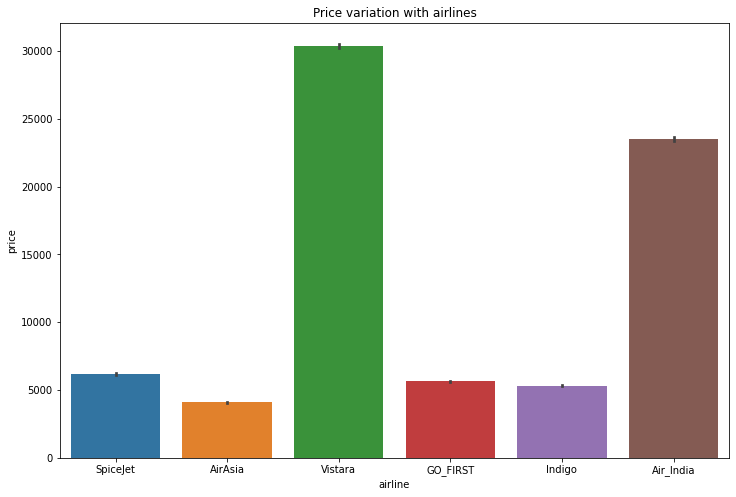

In [8]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Price variation with airlines')
sns.barplot(x='airline',y= 'price', data=df)

**Question B)** How is the price affected when tickets are bought in just 1 or 2 days before departure?
**Answer**: From above if bought ticket before departure just 1-2 days price will higher

<AxesSubplot:title={'center':'Price affect when book 1 or 2 days before departure'}, xlabel='days_left', ylabel='price'>

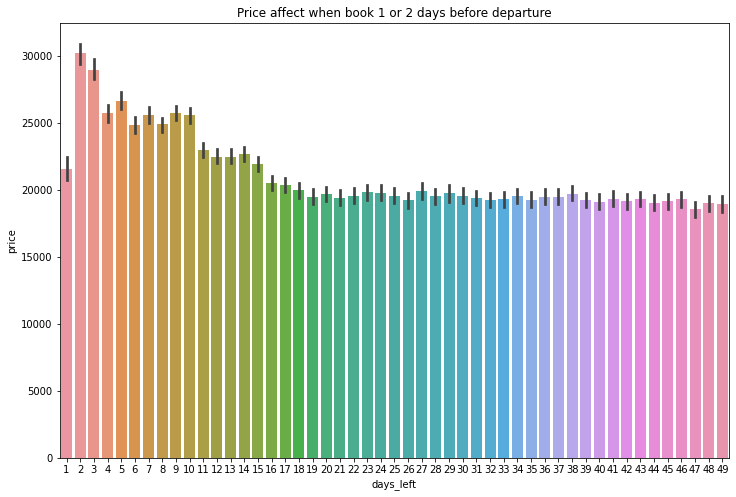

In [9]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Price affect when book 1 or 2 days before departure')
sns.barplot(x='days_left',y= 'price', data=df)

**Question C)** Does ticket price change based on the departure time and arrival time? **Answer:** Yes ticket price change based on the departure time and arrival time *ie. depature_time = Evening and Arrivaltime = night* this made price lower  

Text(0.5, 1.0, 'Price variation with arrival time')

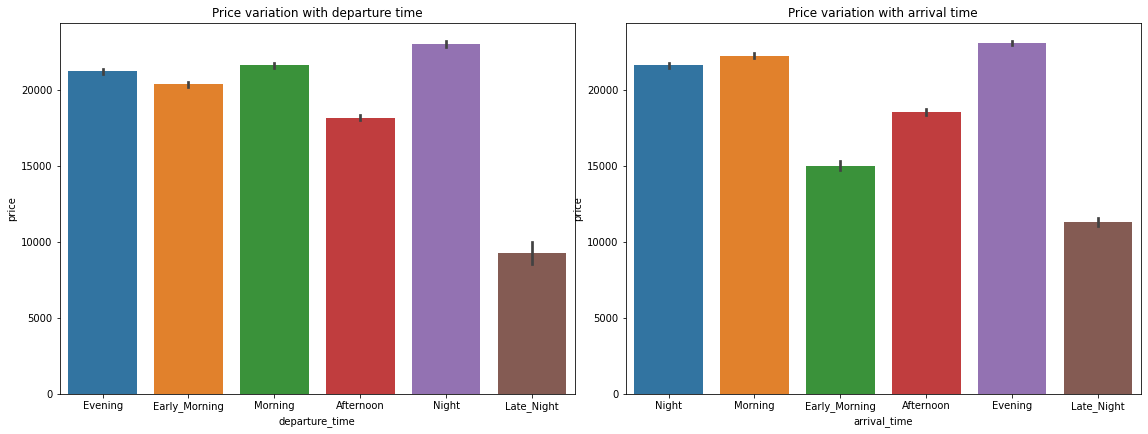

In [10]:
fig, axes= plt.subplots(1,2,figsize= (16,6))
plt.tight_layout(pad=2)
sns.barplot(x='departure_time',y='price',data=df,ax=axes[0])
axes[0].set_title('Price variation with departure time')


sns.barplot(x='arrival_time',y='price',data=df,ax=axes[1])
axes[1].set_title('Price variation with arrival time')



**Question** d) How the price changes with change in Source and Destination?  **Ans:** if source is Delhi price will be high if your destination is bangalore etc. you can see the changed price from above. 

Text(0.5, 1.0, 'Price variation with destination')

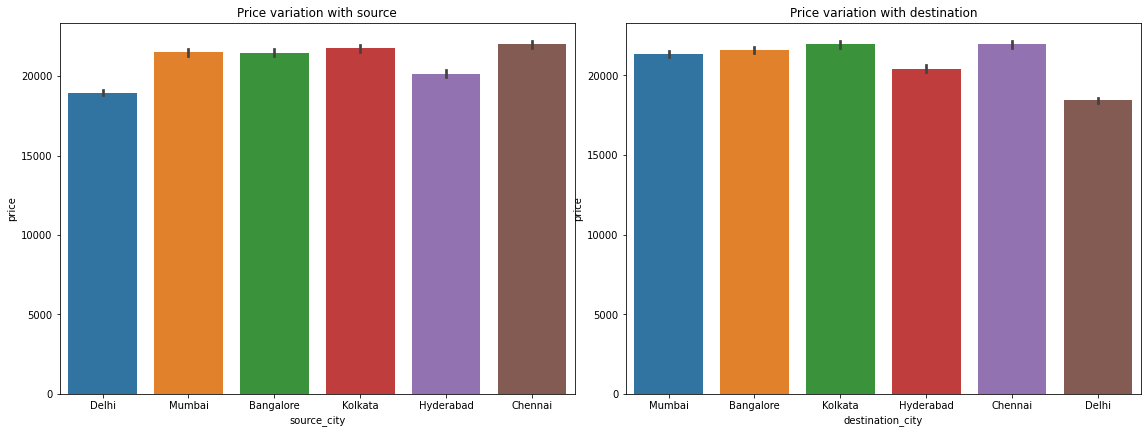

In [11]:
fig, axes= plt.subplots(1,2,figsize= (16,6))
plt.tight_layout(pad=2)
sns.barplot(x='source_city',y='price',data=df,ax=axes[0])
axes[0].set_title('Price variation with source')


sns.barplot(x='destination_city',y='price',data=df,ax=axes[1])
axes[1].set_title('Price variation with destination')


**Question:**e) How does the ticket price vary between Economy and Business class? **Ans:** There are only two airlines that do have business class and  Business class is more expensive than Economy class too much.

<AxesSubplot:title={'center':'Price vary between the class'}, xlabel='class', ylabel='price'>

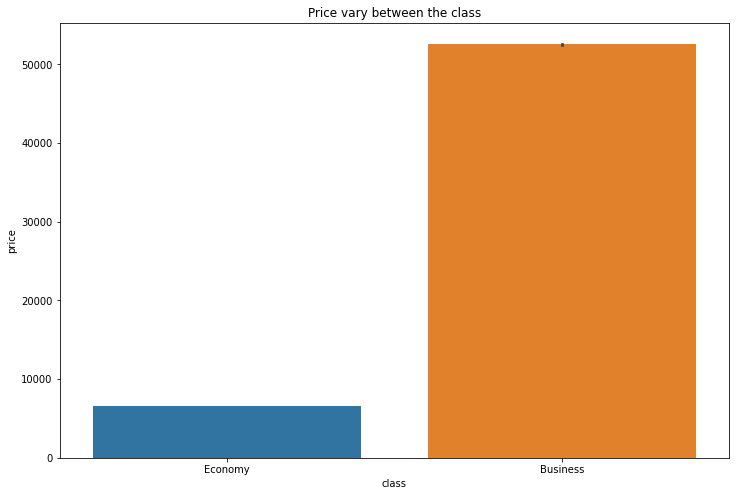

In [12]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Price vary between the class')
sns.barplot(x = 'class',y='price',data=df)

# Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

**Preprocessing**

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
cat_columns = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class',]
num_columns = ['duration','days_left']

In [16]:
encoder = OrdinalEncoder().fit_transform(df[cat_columns])
encoder = pd.DataFrame(encoder,columns = cat_columns)

In [17]:
X = pd.concat([encoder,df[num_columns]],axis=1)
Y= df['price']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)*100
print("ML model Accuracy is",accuracy,'%')

ML model Accuracy is 90.45747930770209 %


In [20]:
print("r2_score: ",r2_score(y_test,y_pred))

r2_score:  0.9045747930770209


In [21]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [22]:
def rmse(y_pred, y_actual):
    return np.sqrt(np.sum((y_pred-y_actual)**2)/y_actual.shape[0])

In [23]:
y_pred = model.predict(x_test)
print(rmse(y_pred, y_test))

7013.558484851851
